In [1]:
#Import the python packages I'll need
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy import constants as const

In [2]:
#Initialize the relevant constants I'll be using and convert them to CGS units
h = const.h.cgs
k = const.k_B.cgs
c = const.c.cgs
R_sun = const.R_sun.cgs

## Part a

In [3]:
#This function computes the Blackbody intensity given temperature and frequency
def bbody(nu,T):
    B_nu = (2*h*nu**3/c**2)/(np.exp(h*nu/(k*T))-1)
    return B_nu

#This function computes the flux density (spectrum) given a certain source radius and source distance
def spectrum(B_nu,R,d):
    F_nu = np.pi*B_nu*(R/d)**2 #The factor of pi takes into account integrating over the solid angle of the source
    return F_nu

Text(0.5, 0, '$\\nu$ (Hz)')

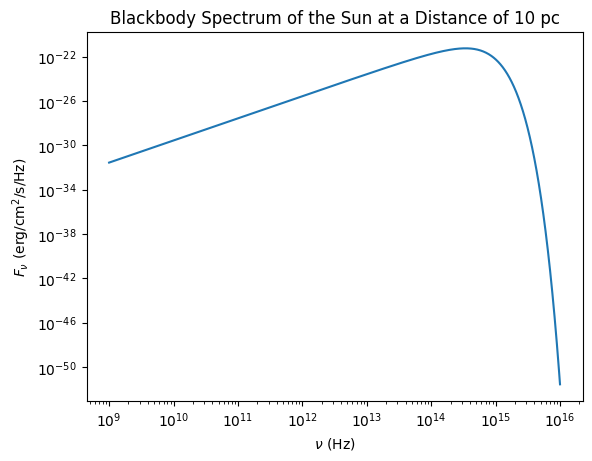

In [4]:
#Calculate the spectrum of the Sun observed from 10 pc away
nu_array = np.logspace(9,16,1000) * u.Hz #Create an array of frequency values to sample (evenly sampled in log space)
T = 5800 * u.K #Set temperature of sun
R = R_sun.to(u.pc) #Set radius of source
d = 10 * u.pc #Set distance to source

B_nu_array = [bbody(nu,T) for nu in nu_array] #Calculate blackbody intensity
F_nu_array = [spectrum(B_nu,R,d) for B_nu in B_nu_array] #Calculate spectrum from that blackbody intensity
F_nu_array_vals = []
for element in F_nu_array:
    F_nu_array_vals.append(element.value) #Change elements to raw numbers for plotting purposes

#Plot the results
plt.figure()
plt.plot(nu_array.value,F_nu_array_vals)
plt.xscale('log')
plt.yscale('log')
plt.title('Blackbody Spectrum of the Sun at a Distance of 10 pc')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')

## Part b

First consider a Sun-like star with an M5 Dwarf Companion

Text(0.5, 0, '$\\nu$ (Hz)')

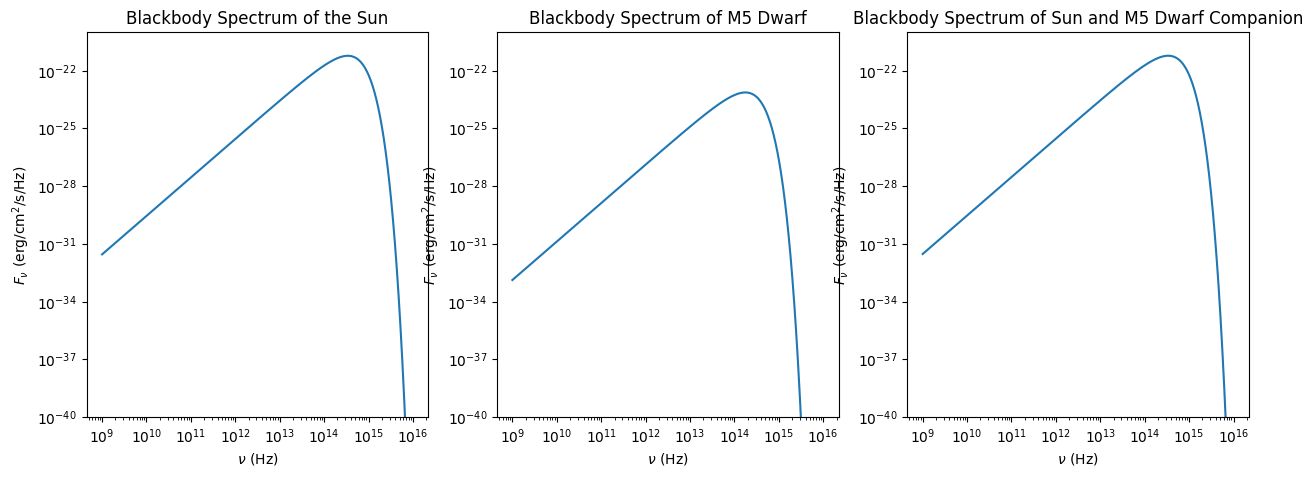

In [148]:
nu_array = np.logspace(9,16,1000) * u.Hz #Create an array of frequency values to sample (evenly sampled in log space)

#Calculate the spectrum of the M5 Dwarf Companion
TM5 = 3000 * u.K #Temperature estimate from Rajpurohit et al. 2013
RM5 = 0.3 * R_sun.to(u.pc) #Radius estimate from Rabus et al. 2019
d = 10 * u.pc

B_nu_array_M5 = [bbody(nu,TM5) for nu in nu_array] #Calculate blackbody intensity
F_nu_array_M5 = [spectrum(B_nu,RM5,d) for B_nu in B_nu_array_M5] #Calculate spectrum from that blackbody intensity
F_nu_array_vals_M5 = []
for element in F_nu_array_M5:
    F_nu_array_vals_M5.append(element.value) #Change elements to raw numbers for plotting purposes

Combined = [a+b for a,b in zip(F_nu_array_vals,F_nu_array_vals_M5)]

#Plot each individual spectrum and then combined
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(nu_array.value,F_nu_array_vals)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-20)
plt.title('Blackbody Spectrum of the Sun')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')

plt.subplot(1,3,2)
plt.plot(nu_array.value,F_nu_array_vals_M5)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-20)
plt.title('Blackbody Spectrum of M5 Dwarf')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')

plt.subplot(1,3,3)
plt.plot(nu_array.value,Combined)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-20)
plt.title('Blackbody Spectrum of Sun and M5 Dwarf Companion')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')



Now consider an M5 Dwarf with a 10,000 K White Dwarf companion

Text(0.5, 0, '$\\nu$ (Hz)')

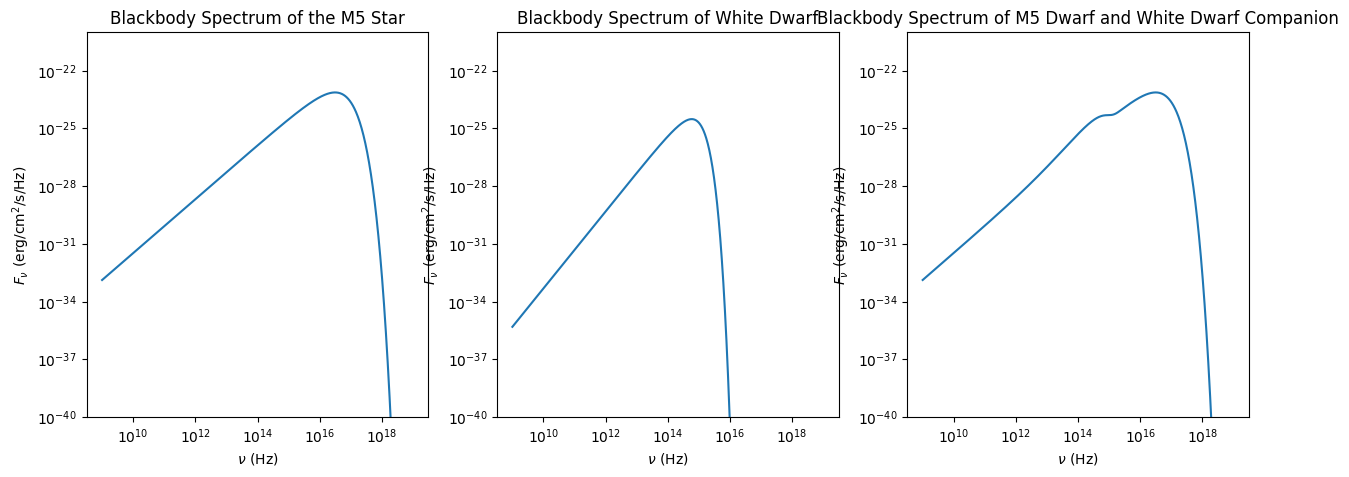

In [147]:
#Calculate the spectrum of the WD

TWD = 10000 * u.K 
RWD = 0.01 * R_sun.to(u.pc) #Radius estimate from Parsons et al. 2017
d = 10 * u.pc

B_nu_array_WD = [bbody(nu,TWD) for nu in nu_array] #Calculate blackbody intensity
F_nu_array_WD = [spectrum(B_nu,RWD,d) for B_nu in B_nu_array_WD] #Calculate spectrum from that blackbody intensity
F_nu_array_vals_WD = []
for element in F_nu_array_WD:
    F_nu_array_vals_WD.append(element.value) #Change elements to raw numbers for plotting purposes

Combined = [a+b for a,b in zip(F_nu_array_vals_M5,F_nu_array_vals_WD)]

#Plot each individual spectrum and then combined
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(nu_array.value,F_nu_array_vals_M5)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-20)
plt.title('Blackbody Spectrum of the M5 Star')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')

plt.subplot(1,3,2)
plt.plot(nu_array.value,F_nu_array_vals_WD)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-20)
plt.title('Blackbody Spectrum of White Dwarf')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')

plt.subplot(1,3,3)
plt.plot(nu_array.value,Combined)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-20)
plt.title('Blackbody Spectrum of M5 Dwarf and White Dwarf Companion')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')



Now consider Arcturus and a 1,000,000 K neutron star companion

Text(0.5, 0, '$\\nu$ (Hz)')

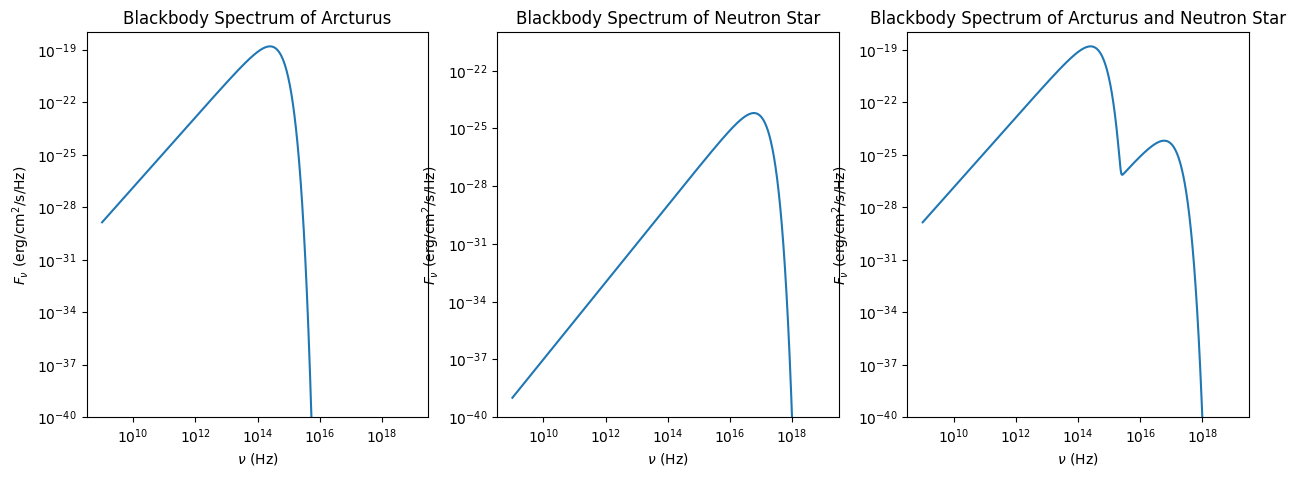

In [146]:
nu_array = np.logspace(9,19,1000) * u.Hz #Create an array of frequency values to sample (evenly sampled in log space)

#Calculate the spectrum of Arcturus

TArc = 4286 * u.K 
RArc = 25.4 * R_sun.to(u.pc) #Radius estimate from Parsons et al. 2017
d = 10 * u.pc

B_nu_array_Arc = [bbody(nu,TArc) for nu in nu_array] #Calculate blackbody intensity
F_nu_array_Arc = [spectrum(B_nu,RArc,d) for B_nu in B_nu_array_Arc] #Calculate spectrum from that blackbody intensity
F_nu_array_vals_Arc = []
for element in F_nu_array_Arc:
    F_nu_array_vals_Arc.append(element.value) #Change elements to raw numbers for plotting purposes

#Calculate the spectrum of the NS
TNS = 1000000 * u.K 
RNS = (10 * u.km).to(u.pc)
d = 10 * u.pc

B_nu_array_NS = [bbody(nu,TNS) for nu in nu_array] #Calculate blackbody intensity
F_nu_array_NS = [spectrum(B_nu,RNS,d) for B_nu in B_nu_array_NS] #Calculate spectrum from that blackbody intensity
F_nu_array_vals_NS = []
for element in F_nu_array_NS:
    F_nu_array_vals_NS.append(element.value) #Change elements to raw numbers for plotting purposes

Combined = [a+b for a,b in zip(F_nu_array_vals_Arc,F_nu_array_vals_NS)]

#Plot each individual spectrum and then combined
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(nu_array.value,F_nu_array_vals_Arc)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-18)
plt.title('Blackbody Spectrum of Arcturus')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')

plt.subplot(1,3,2)
plt.plot(nu_array.value,F_nu_array_vals_NS)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-20)
plt.title('Blackbody Spectrum of Neutron Star')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')

plt.subplot(1,3,3)
plt.plot(nu_array.value,Combined)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-18)
plt.title('Blackbody Spectrum of Arcturus and Neutron Star')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')

## Part d

In [13]:
from scipy.integrate import quad #How I'll be doing the numerical integration

In [109]:
#Set given parameters
T = 3000 * u.K
R_star = 5 * R_sun
R_C = (100 * u.AU).to(u.cm)

#Define integrand function and numerically integrate
def integrand(nu):
    nu = nu*u.Hz
    return (np.pi * (2*h*nu**3/c**2)/(np.exp(h*nu/(k*T))-1)*((R_star/R_C)**2)*(1-np.exp(-nu/(3e14*u.Hz)))).value
result, error = quad(integrand, 1e13, 1e16) #Restrict integration range to where flux dominates
result = result * u.erg / (u.cm**2 * u.s) #Restore units of flux to the result

#Calculate temperature
T_C = (result / (2*const.sigma_sb.cgs))**(1/4)
print('Average Temperature of Cloud:', T_C.value,' K')

Average Temperature of Cloud: 32.55939631956158  K


## Part e

Text(0.5, 0, '$\\nu$ (Hz)')

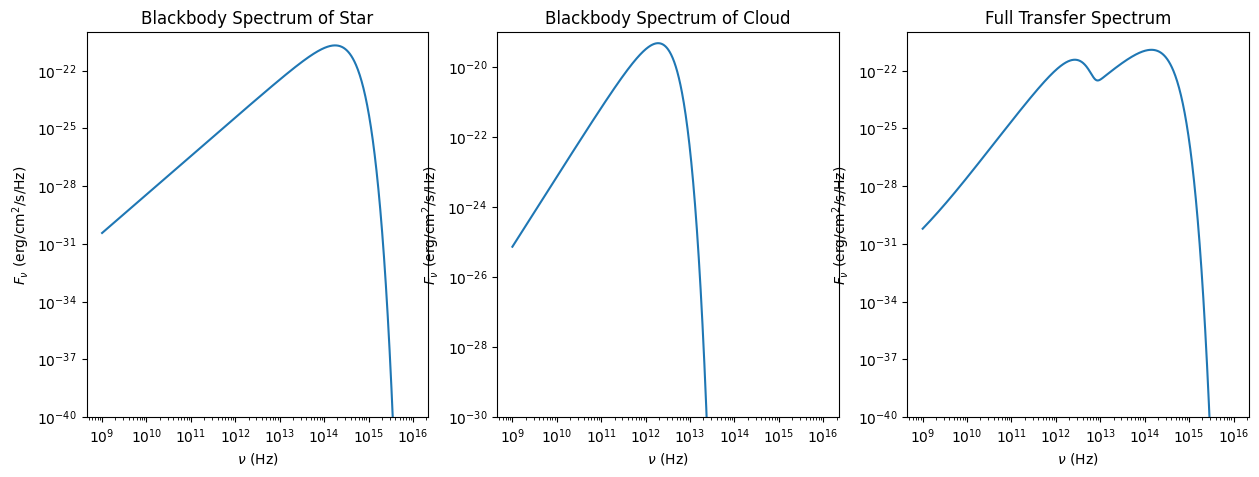

In [143]:
nu_array_e = np.logspace(9,16,1000) * u.Hz

#Calculate combined spectrum of source + cloud
T = 3000 * u.K
R_star = 5 * R_sun
R_C = (100 * u.AU).to(u.cm)
d = (10 * u.pc).to(u.cm)

I_nu_0 = [spectrum(bbody(nu,T),R_star,d) for nu in nu_array_e] #Calculate blackbody spectrum of source
S_nu = [spectrum(bbody(nu,T_C),R_C,d) for nu in nu_array_e] #Calculate blackbody spectrum of cloud

CombinedSpec = []
for i in range(len(I_nu_0)):
    x = I_nu_0[i]*np.exp(-nu_array_e[i]/(3e14*u.Hz))+S_nu[i]*(1-np.exp(-nu_array_e[i]/(3e14*u.Hz))) #Combine the spectra given form of optical depth
    CombinedSpec.append(x)
CombinedSpecVals = []
I_nu_0_vals = []
S_nu_vals = []
for element in CombinedSpec:
    CombinedSpecVals.append(element.value)
for element in I_nu_0:
    I_nu_0_vals.append(element.value)
for element in S_nu:
    S_nu_vals.append(element.value)

#Plot the individual and combined spectrum
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(nu_array_e.value,I_nu_0_vals)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-20)
plt.title('Blackbody Spectrum of Star')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')

plt.subplot(1,3,2)
plt.plot(nu_array_e.value,S_nu_vals)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-30,1e-19)
plt.title('Blackbody Spectrum of Cloud')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')

plt.subplot(1,3,3)
plt.plot(nu_array_e.value,CombinedSpecVals)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-20)
plt.title('Full Transfer Spectrum')
plt.ylabel(r'$F_\nu$ (erg/cm$^2$/s/Hz)')
plt.xlabel(r'$\nu$ (Hz)')